# <font color="darkblue"> Prática 01: Árvore de Decisão - Heurística ID3 </font>

**Objetivos:**


*   Implementar o algoritmo de formação de uma árvore de decisão por indução de dados
*   Compreender os conceitos de: entropia, divisão do nó (split), atributos para divisão do nó, profundida da árvore de decisão 

**Requisitos de execução:**


**Atividade 1:**

1. Construir a base de dados exemplo contida nos slides.



*   $[ (x_1, y_1), (x_2, y_2), .. (x_N, y_N) ]$
*   Cada entrada $x_i$ é um dicionário com as chaves $\{'level', 'lang', 'tweets',  'phd'\}$ e seus valores associados
*   $y_i \in [False,True]$

    

In [1]:
X = [
    {'level':'Senior', 'lang': 'Java', 'tweets':'no', 'phd':'no'},
    {'level':'Senior', 'lang': 'Java', 'tweets':'no', 'phd':'yes'},
    {'level':'Mid', 'lang': 'Python', 'tweets':'no', 'phd':'no'},
    {'level':'Junior', 'lang': 'Python', 'tweets':'no', 'phd':'no'},
    {'level':'Junior', 'lang': 'R', 'tweets':'yes', 'phd':'no'},
    {'level':'Junior', 'lang': 'R', 'tweets':'yes', 'phd':'yes'},
    {'level':'Mid', 'lang': 'R', 'tweets':'yes', 'phd':'yes'},
    {'level':'Senior', 'lang': 'Python', 'tweets':'no', 'phd':'no'},
    {'level':'Senior', 'lang': 'R', 'tweets':'yes', 'phd':'no'},
    {'level':'Junior', 'lang': 'Python', 'tweets':'yes', 'phd':'no'},
    {'level':'Senior', 'lang': 'Python', 'tweets':'yes', 'phd':'yes'},
    {'level':'Mid', 'lang': 'Python', 'tweets':'no', 'phd':'yes'},
    {'level':'Mid', 'lang': 'Java', 'tweets':'yes', 'phd':'no'},
    {'level':'Junior', 'lang': 'Python', 'tweets':'no', 'phd':'yes'}
]

y = [False, False, True, True, True, False, True, False, True, True, True, True, True, False]

print(X[0])
print(X[0]['level'])
print(X[0].keys())
print(X[0].values())

print(y)

{'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'no'}
Senior
dict_keys(['level', 'lang', 'tweets', 'phd'])
dict_values(['Senior', 'Java', 'no', 'no'])
[False, False, True, True, True, False, True, False, True, True, True, True, True, False]


**Atividade 2:**

1. Implementar um código que separe os dados de $X$ e $y$ pelos valores de seus atributos (chaves dos dicionários $x_i$)



> atributos = ['level', 'lang', 'tweets', 'phd']




In [2]:
from collections import defaultdict

def partition_by(X, y, attribute):
    part_X = defaultdict(list)
    part_y = defaultdict(list)
    for x, _y in zip(X, y):
        value = x[attribute] #pega o valor do atributo especifico 
        part_X[value].append(x) 
        part_y[value].append(_y) 
    return part_X, part_y



part_X, part_y = partition_by(X, y, 'level')

for label in ['Senior', 'Mid', 'Junior']:
  print(label)
  print(part_X[label])



Senior
[{'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'no'}, {'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'yes'}, {'level': 'Senior', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, {'level': 'Senior', 'lang': 'R', 'tweets': 'yes', 'phd': 'no'}, {'level': 'Senior', 'lang': 'Python', 'tweets': 'yes', 'phd': 'yes'}]
Mid
[{'level': 'Mid', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, {'level': 'Mid', 'lang': 'R', 'tweets': 'yes', 'phd': 'yes'}, {'level': 'Mid', 'lang': 'Python', 'tweets': 'no', 'phd': 'yes'}, {'level': 'Mid', 'lang': 'Java', 'tweets': 'yes', 'phd': 'no'}]
Junior
[{'level': 'Junior', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, {'level': 'Junior', 'lang': 'R', 'tweets': 'yes', 'phd': 'no'}, {'level': 'Junior', 'lang': 'R', 'tweets': 'yes', 'phd': 'yes'}, {'level': 'Junior', 'lang': 'Python', 'tweets': 'yes', 'phd': 'no'}, {'level': 'Junior', 'lang': 'Python', 'tweets': 'no', 'phd': 'yes'}]


**Atividade 3:**

1. Computar as entropias de cada rótulo contido nos valores de um atributo

Seja
  

*   $l$ : rótulo de um atributo
*   $p_{true}(l)$ : proporção de classificações $True$ associados ao rótulo $l$ 
*   $p_{false}(l)$ : proporção de classificações $False$ associados ao rótulo $l$


$entropia(l) = -p_{true}(l)\log p_{true}(l) - p_{false}(l)\log p_{false}(l)$ 

[0.9182958340544896, 0.863120568566631, 0.8112781244591328]


<BarContainer object of 3 artists>

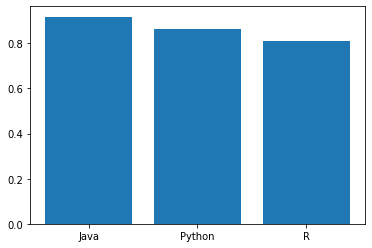

In [3]:
from collections import Counter
import math
from matplotlib import pyplot as plt

"""Computa a proporcao de cada classe de dados contida em labels"""
def class_probabilities(labels):
    total_count = float(len(labels))
    return [count / total_count for count in Counter(labels).values()]

def entropy(class_probabilities):
    """Calculo da entropia das probabilidades"""
    return sum(-(p*math.log(p, 2)) 
        for p in class_probabilities
        if p) #ignora probabilidade 0

def data_entropy(label_data):
    probabilities = class_probabilities(label_data)
    return entropy(probabilities)

part_X, part_y = partition_by(X, y, 'lang')
labels = ['Java', 'Python', 'R']
entropies = [data_entropy(part_y[label]) for label in labels]

print(entropies)
plt.bar(labels, entropies)

**Atividade 4:**

1. Computar a entropia de cada partição dos atributos $\{'level', 'lang', 'tweets',  'phd'\}$

Seja
*   $H$ : partição de rótulo associados ao mesmo atributo;
*   $l$ : um rótulo pertencente à $H$
*   $q_l$ : proporção de rótulos $l$ em $H$

$entropia(H) = \sum_{l \in H} q_l \cdot entropia(l) $

[0.6935361388961919, 0.8601317128547441, 0.7884504573082896, 0.8921589282623617]


<BarContainer object of 4 artists>

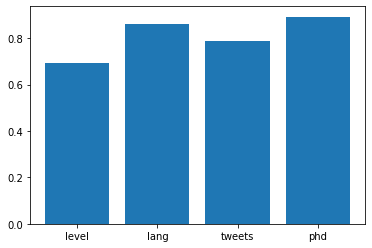

In [4]:
def partition_entropy(subsets):
    """Cada particao eh um subconjunto de valores associados ao mesmo atributo"""
    total_count = float(sum(len(subset) for subset in subsets))
    
    return sum( data_entropy(subset) * len(subset) / total_count
               for subset in subsets)

def partition_entrope_by(X, y, attribute):
    part_X, part_y = partition_by(X, y, attribute)
    return partition_entropy(part_y.values())

partitions = ['level', 'lang', 'tweets', 'phd']
entropies = [partition_entrope_by(X, y, partition) for partition in partitions]

print(entropies)
plt.bar(partitions, entropies)

**Atividade 5:**

1. Implementar a heurística gulosa de ajustamento dos dados por criação de Árvore de Decisão:


*   Testa se está numa folha: (1) só há rótulo True ou False ou (2) se não há mais atributos para separar, se sim cria a folha específica;
*   Entre os atributos candidatos pegar o atributo $a$ de menor entropia (escolha gulosa);
*   Retira o atributo $a$ da lista de candidatos;
*   Para todo rótulo do atributo $a$ construir uma subárvore de decisão com os atributos candidatos restantes.



In [5]:
def fit(X, y, split_candidates=None):
    #Primeira iteracao todos atributos sao candidatos
    if split_candidates is None:
        split_candidates = X[0].keys()

    #conta o numero de true e false
    num_inputs = len(X)
    num_trues = len([_y for _y in y if _y == True])
    num_falses = num_inputs - num_trues

    if num_trues == 0: return False #folha False
    if num_falses == 0: return True #folha True

    if not split_candidates:
        return num_trues > num_falses #sem candidatos p dividr retorne o majoritario 


    #divida pelo atributo de menor entropia
    #decisão gulosa
    best_attribute = None
    best_part_entrope = float('inf')
    for cand in split_candidates:
        part_entrope = partition_entrope_by(X, y, cand)
        if best_part_entrope > part_entrope:
            best_part_entrope = part_entrope
            best_attribute = cand

    part_X, part_y = partition_by(X, y, best_attribute)
    #Remove o atibuto já particionado
    new_candidates = [a for a in split_candidates
                      if a != best_attribute]


    #constroi a arvore recursivamente
    subtrees = {attribute_value : fit(part_X[attribute_value], part_y[attribute_value], new_candidates) 
              for attribute_value in part_X.keys()}

    #Classificação padrão para valores desconhecidos
    subtrees[None] = num_trues > num_falses

    return (best_attribute, subtrees)

tree = fit(X, y)
print(tree)

('level', {'Senior': ('tweets', {'no': False, 'yes': True, None: False}), 'Mid': True, 'Junior': ('phd', {'no': True, 'yes': False, None: True}), None: True})


**Atividade 6:**

1. Implementar a classificação do novo dado $x$ utilizando a árvore de decisão criada (busca em árvore):

*   Testa se já alcançamos uma folha e retorna a classificação encontrada;
*   Acessa o atributo que produziu a divisão do nó corrente e retorna a classificação recursiva de $x$ pela sub-árvore associada ao rótulo deste atributo em $x$.

In [7]:
#classifica a entrada baseado na arvore fornecida
def predict(tree, x):
    #se for no folha, retorna seu valor
    if tree in [True, False]:
        return tree

    #Vai descer em ramo da arvore (uma das sub-arvores no subtree_dict) 
    #definido pelo atributo do nó atual
    attribute, subtree_dict = tree

    subtree_key = x.get(attribute) #None se estiver faltando caracteristicas

    if subtree_key not in subtree_dict:
        subtree_key = None

    subtree = subtree_dict[subtree_key]	#pega sub-arvore apropriada
    return predict(subtree, x)


x_test = [{"level": "Junior", "lang" : "Java", "tweets" : "yes", "phd" : "no"}]
x_test.append({"level": "Junior", "lang" : "Java", "tweets" : "yes", "phd" : "yes"})

for x in x_test:
    print(x)
    print(predict(tree, x))

{'level': 'Junior', 'lang': 'Java', 'tweets': 'yes', 'phd': 'no'}
True
{'level': 'Junior', 'lang': 'Java', 'tweets': 'yes', 'phd': 'yes'}
False
